<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/TM_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1

In [ ]:
# 📦 Install necessary libraries
!pip install nltk
!pip install python-docx  # Included to stay consistent with your professor's setup

# 📚 Import required libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from docx import Document  # Still imported for consistency
import os
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
# 📥 Download required NLTK resources
nltk.download('punkt_tab')     # As in your professor's code
nltk.download('punkt')         # Actually required for tokenization
nltk.download('vader_lexicon') # For sentiment analysis

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# 📄 Step 1: Load your .txt file
txt_path = '/content/World Day Against Child Labour, ann.txt'  # Replace with your filename

if os.path.exists(txt_path):
    with open(txt_path, 'r', encoding='utf-8') as file:
        text = file.read()
    print("✅ Text file loaded successfully.")
else:
    print(f"❌ Error: File not found at {txt_path}. Please upload the file.")
    text = ""

✅ Text file loaded successfully.


In [ ]:
text

'World Day Against Child Labour, annually on June 12th, was first launched in 2002 by the ILO to raise awareness and foster activism aimed at preventing child labour. This day brings together governments, local authorities, civil society, international organizations, workers, and employers to highlight the issue of child labour and to define effective strategies for its elimination.1 Despite progress over the past two decades, conflicts, economic crises, and the lingering impacts of the COVID-19 pandemic have reversed many of these gains, making it more critical than ever to renew global efforts against child labour.2 \n\nBroken Chalk, an Amsterdam-based non-governmental organisation committed to addressing human rights violations in the education sector, joins this global call to action. Our organisation, established in October 2020, is dedicated to removing obstacles to education, promoting peace and tolerance through intercultural understanding, preventing radicalism and polarisatio

In [ ]:
# ✂️ Step 2: Tokenize the text
tokens = word_tokenize(text)
print(f"\n🔹 Number of tokens: {len(tokens)}")
print("🔹 First 20 tokens:", tokens[:20])


🔹 Number of tokens: 657
🔹 First 20 tokens: ['World', 'Day', 'Against', 'Child', 'Labour', ',', 'annually', 'on', 'June', '12th', ',', 'was', 'first', 'launched', 'in', '2002', 'by', 'the', 'ILO', 'to']


In [ ]:
# 📊 Step 3: Word Frequency Distribution
filtered_tokens = [word.lower() for word in tokens if word.isalpha()]
fdist = FreqDist(filtered_tokens)

In [ ]:
fdist

FreqDist({'to': 28, 'and': 24, 'the': 20, 'child': 18, 'labour': 17, 'of': 17, 'in': 14, 'a': 10, 'for': 9, 'this': 8, ...})

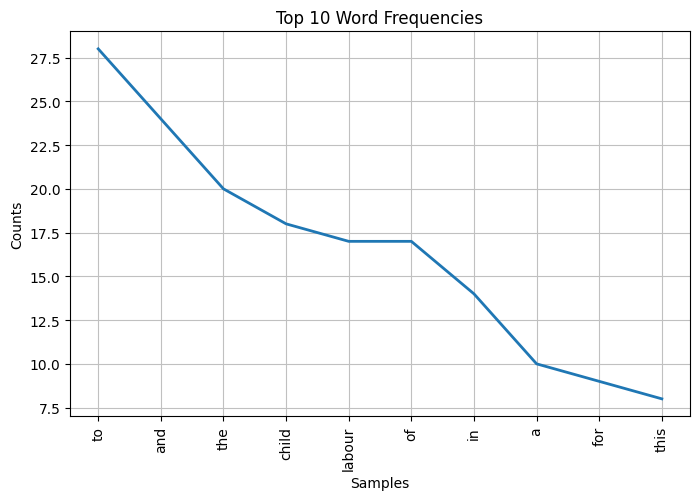

In [ ]:
# Plot top 10 frequent words
plt.figure(figsize=(8, 5))
fdist.plot(10, title='Top 10 Word Frequencies')
plt.show()

# Section 2

In [ ]:
# 💬 Step 4: Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)

In [ ]:
# 🧠 Step 5: Interpret overall sentiment
compound = sentiment_scores['compound']
if compound >= 0.05:
    sentiment = 'Positive'
elif compound <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

In [ ]:
print("\n🔹 Sentiment Scores:", sentiment_scores)
print("🔹 Overall Sentiment:", sentiment)


🔹 Sentiment Scores: {'neg': 0.085, 'neu': 0.779, 'pos': 0.136, 'compound': 0.9797}
🔹 Overall Sentiment: Positive


In [ ]:
# 📈 Step 6: Visualize Sentiment Scores
labels = list(sentiment_scores.keys())
scores = list(sentiment_scores.values())

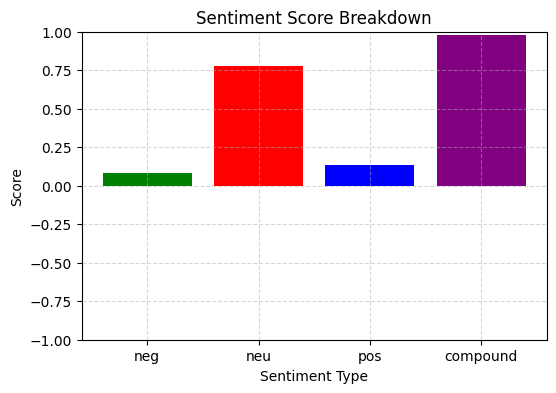

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['green', 'red', 'blue', 'purple'])
plt.title('Sentiment Score Breakdown')
plt.xlabel('Sentiment Type')
plt.ylabel('Score')
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Section 3

In [ ]:
# 🧩 Step 7: Word-Level Sentiment Count
pos_count = neg_count = neu_count = 0
for word in filtered_tokens:
    score = sia.polarity_scores(word)['compound']
    if score >= 0.05:
        pos_count += 1
    elif score <= -0.05:
        neg_count += 1
    else:
        neu_count += 1

In [ ]:
print(f"\n🔹 Word-Level Sentiment Breakdown:")
print(f"Positive words: {pos_count}")
print(f"Negative words: {neg_count}")
print(f"Neutral words: {neu_count}")


🔹 Word-Level Sentiment Breakdown:
Positive words: 38
Negative words: 16
Neutral words: 505


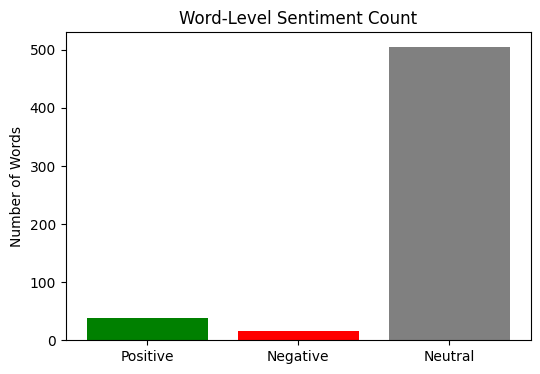

In [ ]:
# Plot word-level sentiment breakdown
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative', 'Neutral'], [pos_count, neg_count, neu_count], color=['green', 'red', 'gray'])
plt.title('Word-Level Sentiment Count')
plt.ylabel('Number of Words')
plt.show()

In [ ]:
# 🌟 Most Positive and Negative Words
scored_words = [(word, sia.polarity_scores(word)['compound']) for word in set(filtered_tokens)]
most_positive = sorted(scored_words, key=lambda x: x[1], reverse=True)[:5]
most_negative = sorted(scored_words, key=lambda x: x[1])[:5]

In [ ]:
print("\n🔹 Top 5 Positive Words:")
for word, score in most_positive:
    print(f"{word}: {score:.2f}")

print("\n🔹 Top 5 Negative Words:")
for word, score in most_negative:
    print(f"{word}: {score:.2f}")


🔹 Top 5 Positive Words:
peace: 0.54
justice: 0.53
enjoys: 0.51
free: 0.51
effective: 0.48

🔹 Top 5 Negative Words:
worst: -0.62
violations: -0.53
violation: -0.49
broken: -0.48
problems: -0.40


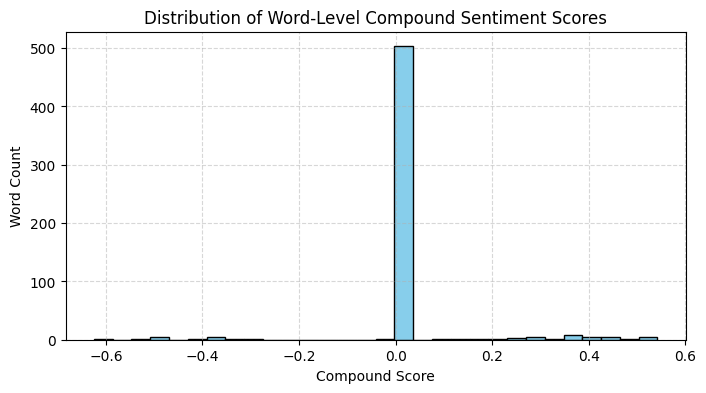

In [ ]:
# 📉 Histogram of compound scores
compound_scores = [sia.polarity_scores(word)['compound'] for word in filtered_tokens]

plt.figure(figsize=(8, 4))
plt.hist(compound_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word-Level Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Word Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# 📌 Extra Text Stats
unique_words = set(filtered_tokens)
avg_word_length = sum(len(word) for word in filtered_tokens) / len(filtered_tokens)

print(f"\n🔹 Number of Unique Words: {len(unique_words)}")
print(f"🔹 Average Word Length: {avg_word_length:.2f} characters")


🔹 Number of Unique Words: 272
🔹 Average Word Length: 5.35 characters


# Section 4

In [ ]:
from nltk.tokenize import sent_tokenize
# 🔍 NEW: Sentence-Level Sentiment Analysis
sentences = sent_tokenize(text)
sentence_sentiments = []

for sentence in sentences:
    score = sia.polarity_scores(sentence)['compound']
    sentence_sentiments.append((sentence, score))

# Count each sentiment type
pos_sent = len([s for s in sentence_sentiments if s[1] >= 0.05])
neg_sent = len([s for s in sentence_sentiments if s[1] <= -0.05])
neu_sent = len(sentences) - pos_sent - neg_sent

In [ ]:
print(f"\n🔹 Sentence-Level Sentiment Counts:")
print(f"Positive sentences: {pos_sent}")
print(f"Negative sentences: {neg_sent}")
print(f"Neutral sentences: {neu_sent}")


🔹 Sentence-Level Sentiment Counts:
Positive sentences: 9
Negative sentences: 8
Neutral sentences: 2


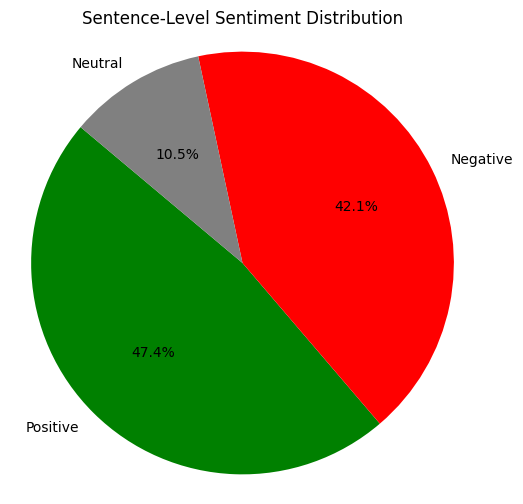

In [ ]:
# 🥧 Pie chart for sentence sentiment
plt.figure(figsize=(6, 6))
plt.pie([pos_sent, neg_sent, neu_sent], labels=['Positive', 'Negative', 'Neutral'],
        autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentence-Level Sentiment Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# 🔎 Most Positive and Negative Sentences
most_pos_sent = max(sentence_sentiments, key=lambda x: x[1])
most_neg_sent = min(sentence_sentiments, key=lambda x: x[1])

print("\n🔹 Most Positive Sentence:\n", most_pos_sent[0])
print("Score:", most_pos_sent[1])

print("\n🔹 Most Negative Sentence:\n", most_neg_sent[0])
print("Score:", most_neg_sent[1])


🔹 Most Positive Sentence:
 By uniting our efforts, we can build a future where every child enjoys their right to a childhood free from labour and filled with opportunities for education, growth, and development.
Score: 0.8957

🔹 Most Negative Sentence:
 This day brings together governments, local authorities, civil society, international organizations, workers, and employers to highlight the issue of child labour and to define effective strategies for its elimination.1 Despite progress over the past two decades, conflicts, economic crises, and the lingering impacts of the COVID-19 pandemic have reversed many of these gains, making it more critical than ever to renew global efforts against child labour.2 

Broken Chalk, an Amsterdam-based non-governmental organisation committed to addressing human rights violations in the education sector, joins this global call to action.
Score: -0.6155
